In [1]:
%matplotlib inline


# Between-volumes Motion Correction on DWI datasets

## Overview
During a dMRI acquisition, the subject motion inevitable. This motion implies
a misalignment between N volumes on a dMRI dataset. A common way to solve this
issue is to perform a registration on each acquired volume to a
reference b = 0. [JenkinsonSmith01]_

This preprocessing is an highly recommended step that should be executed before
any dMRI dataset analysis.


Let's import some essential functions.


In [2]:
from dipy.align import motion_correction
from dipy.core.gradients import gradient_table
from dipy.data import get_fnames
from dipy.io.image import load_nifti, save_nifti
from dipy.io.gradients import read_bvals_bvecs
from os.path import join
import matplotlib.pyplot as plt

## Loading data from dipy

We choose one of the data from the datasets in dipy_. Alternatively, you can
load your customized image data.

In [3]:
dwi_fname, dwi_bval_fname, dwi_bvec_fname = get_fnames('sherbrooke_3shell')

  0%|          | 0/11750 [00:00<?, ? MB/s]

  0%|          | 0/1 [00:00<?, ? MB/s]

  0%|          | 0/1 [00:00<?, ? MB/s]

We load the image and the affine of the image. The affine is the transformation
matrix which maps image coordinates to world (mm) coordinates. We also load the
b-values and b-vectors.



In [13]:
data, affine = load_nifti(dwi_fname)
bvals, bvecs = read_bvals_bvecs(dwi_bval_fname, dwi_bvec_fname)

This data has 193 volumes. For this demo purpose, we decide to reduce the
number of volumes to 5. However, we do not recommended to perform a motion
correction with less than 10 volumes.



In [5]:
data_small = data[..., :3]
bvals_small = bvals[:3]
bvecs_small = bvecs[:3]
gtab = gradient_table(bvals_small, bvecs_small)

## Alternative：Loading Customized data

In [18]:
dname = '3323_niigz'
fdwi = join(dname, "3323_DTI_DTI_pulse_gated_AC_PC_line_20120719121427_2.nii.gz")
fbval = join(dname, '3323_DTI_DTI_pulse_gated_AC_PC_line_20120719121427_2.bval')
fbvec = join(dname, '3323_DTI_DTI_pulse_gated_AC_PC_line_20120719121427_2.bvec')
print(fdwi, fbval, fbvec)

3323_niigz\3323_DTI_DTI_pulse_gated_AC_PC_line_20120719121427_2.nii.gz 3323_niigz\3323_DTI_DTI_pulse_gated_AC_PC_line_20120719121427_2.bval 3323_niigz\3323_DTI_DTI_pulse_gated_AC_PC_line_20120719121427_2.bvec


In [19]:
data, affine, img = load_nifti(fdwi, return_img=True)

In [21]:
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

In [22]:
gtab = gradient_table(bvals, bvecs)

In [24]:
data_small = data[..., :3]
bvals_small = bvals[:3]
bvecs_small = bvecs[:3]
gtab = gradient_table(bvals_small, bvecs_small)

Start motion correction of our reduced DWI dataset(between-volumes motion
correction).



In [25]:
data_corrected, reg_affines = motion_correction(data_small, gtab, affine)

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


Save our DWI dataset corrected to a new Nifti file.



In [26]:
motion_correction_path = join(dname, "motion_correction.nii.gz")
save_nifti(motion_correction_path, data_corrected.get_fdata(),
           data_corrected.affine)

In [27]:
data, affine, img = load_nifti(motion_correction_path, return_img=True)

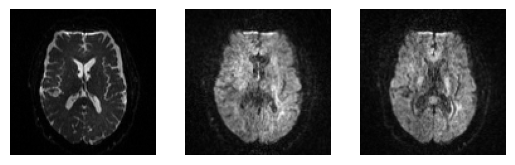

In [34]:
axial_middle = data.shape[2] // 2
plt.figure()
for i in range(3):
    plt.subplot(1, 3, i+1).set_axis_off()
    plt.imshow(data[:, :, axial_middle, i].T, cmap='gray', origin='lower')
motion_correction_pic = join(dname, "motion_correction.png")
plt.savefig(motion_correction_pic, bbox_inches='tight')
plt.show()

In [35]:
data_ori, affin_orie, img_ori = load_nifti(fdwi, return_img=True)

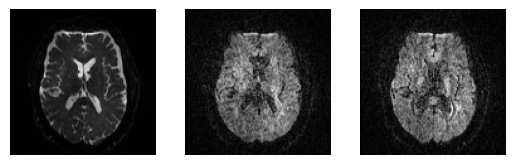

In [36]:
axial_middle = data_ori.shape[2] // 2
plt.figure()
for i in range(3):
    plt.subplot(1, 3, i+1).set_axis_off()
    plt.imshow(data_ori[:, :, axial_middle, i].T, cmap='gray', origin='lower')
ori_pic = join(dname, "ori.png")
plt.savefig(ori_pic, bbox_inches='tight')
plt.show()

## References

.. [JenkinsonSmith01] Jenkinson, M., Smith, S., 2001. A global optimisation
   method for robust affine registration of brain images. Med Image Anal 5
   (2), 143–56.

.. include:: ../links_names.inc

